### Limits of Diversification

##### and the anatomy of cap-weighted portffolio and a bunch of cool Pandas stuff along the way

In [3]:
%load_ext autoreload 
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import analysis_kit as ak

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ind_return=ak.get_ind_returns()
ind_size= ak.get_ind_size()
ind_nfirms=ak.get_ind_nfirms()

In [7]:
ind_return.shape

(1110, 30)

In [8]:
ind_size.shape

(1110, 30)

In [9]:
ind_nfirms.shape

(1110, 30)

#### All three have the same number of rows and columns. This means we are set to go ahead.!

#### If we want to construct a market capitalization weighted index, first we need the market cap for each industry (i.e. 30) each month from 1926 to 2018

In [10]:
ind_mktcap=ind_size * ind_nfirms # Note that this is the market cap for each industry each month starting at 01/1926

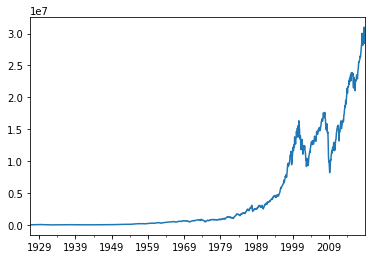

In [13]:
total_mktcap=ind_mktcap.sum(axis="columns") # This is adding up market cap values of each industry across the rows and plotting it
total_mktcap.plot()